In [15]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
data_player = pd.read_csv('./data/player_valuations.csv')
data_player.head()

,player_id,date,market_value_in_eur,current_club_id,player_club_domestic_competition_id
0,405973,2000-01-20,150000,3057,BE1
1,342216,2001-07-20,100000,1241,SC1
2,3132,2003-12-09,400000,126,TR1
3,6893,2003-12-15,900000,984,GB1
4,10,2004-10-04,7000000,398,IT1


In [17]:
data_player.rename(columns={'market_value_in_eur':'Precio_en_euros', 'player_club_domestic_competition_id': 'club_de_competencia'}, inplace=True)
data_player.head()

,player_id,date,Precio_en_euros,current_club_id,club_de_competencia
0,405973,2000-01-20,150000,3057,BE1
1,342216,2001-07-20,100000,1241,SC1
2,3132,2003-12-09,400000,126,TR1
3,6893,2003-12-15,900000,984,GB1
4,10,2004-10-04,7000000,398,IT1


In [18]:
players_sorted = data_player.sort_values(by='Precio_en_euros', ascending=True)
players_sorted.head()

,player_id,date,Precio_en_euros,current_club_id,club_de_competencia
15338,60096,2008-03-17,0,2696,RU1
370966,36237,2021-10-16,10000,68608,PO1
429529,621277,2023-02-06,10000,1005,IT1
429511,456650,2023-02-06,10000,4171,IT1
429524,537142,2023-02-06,10000,1005,IT1


# Estadística Descriptiva
### 1. Resumen estadistico básico

In [19]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)
players_sorted.describe()

,player_id,Precio_en_euros,current_club_id
count,464782.000,464782.000,464782.000
mean,204484.605,2359657.620,4060.930
std,186128.543,6666213.585,9516.104
min,10.000,0.000,3.000
25%,56841.000,200000.000,369.000
50%,149526.000,500000.000,1010.000
75%,297772.000,1500000.000,2969.000
max,1186012.000,200000000.000,83678.000


In [20]:
players_sorted['Precio_en_euros'].mean()

np.float64(2359657.620129437)

In [21]:
players_sorted['Precio_en_euros'].median()

np.float64(500000.0)

In [22]:
players_sorted['Precio_en_euros'].mode()

0    300000
Name: Precio_en_euros, dtype: int64

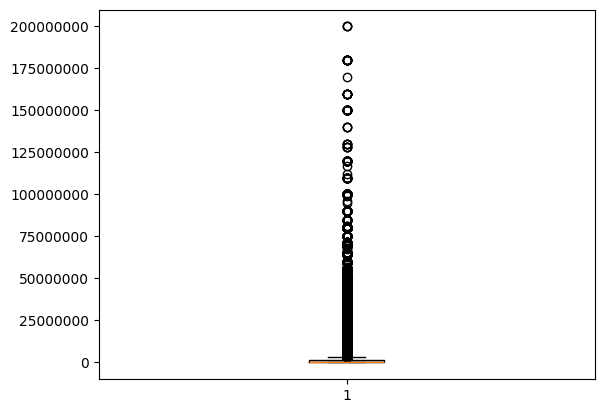

In [23]:
plt.ticklabel_format(style='plain', axis='y')

plt.boxplot(players_sorted['Precio_en_euros'])
plt.show()

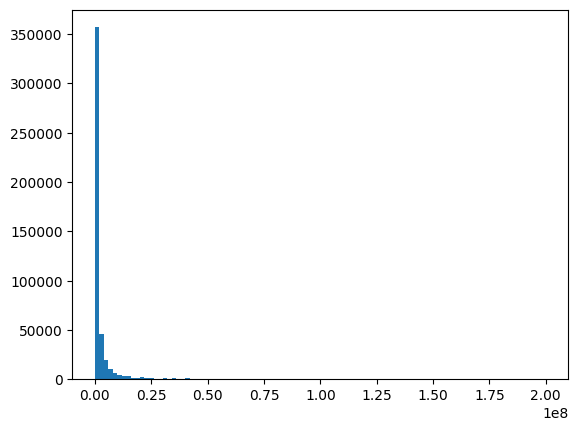

In [26]:
plt.hist(players_sorted['Precio_en_euros'], bins=100)
plt.show()

In [ ]:
# Definir el rango intercuartílico (IQR)
Q1 = players_sorted['Precio_en_euros'].quantile(0.25)
Q3 = players_sorted['Precio_en_euros'].quantile(0.75)
IQR = Q3 - Q1

In [34]:
# Definir los límites inferior y superior
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)


-1750000.0
3450000.0


In [35]:
df = players_sorted
df_filtered = df[(df['Precio_en_euros'] >= lower_bound) & (df['Precio_en_euros'] <= upper_bound)]
df_filtered

,player_id,date,Precio_en_euros,current_club_id,club_de_competencia
15338,60096,2008-03-17,0,2696,RU1
370966,36237,2021-10-16,10000,68608,PO1
429529,621277,2023-02-06,10000,1005,IT1
429511,456650,2023-02-06,10000,4171,IT1
429524,537142,2023-02-06,10000,1005,IT1
...,...,...,...,...,...
15355,18644,2008-03-19,3400000,2687,ES1
15484,40433,2008-03-31,3400000,46,IT1
15560,15762,2008-04-04,3400000,11282,TR1
15574,44027,2008-04-04,3400000,1084,ES1


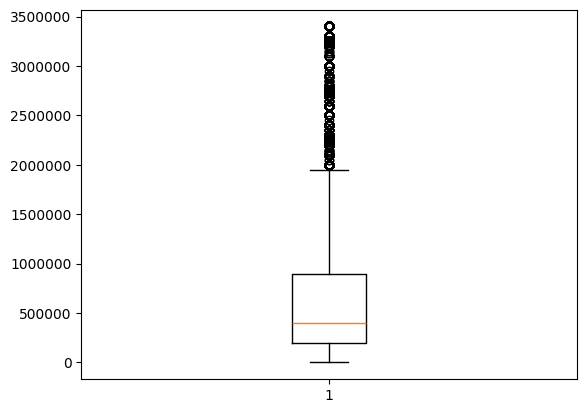

In [36]:
plt.ticklabel_format(style='plain', axis='y')

plt.boxplot(df_filtered['Precio_en_euros'])
plt.show()

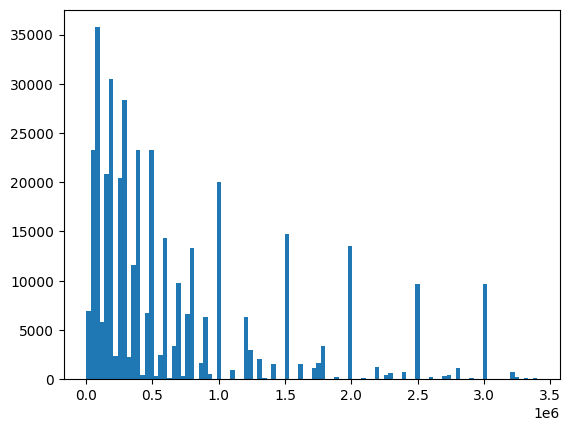

In [37]:
plt.hist(df_filtered['Precio_en_euros'], bins=100)
plt.show()